<a href="https://colab.research.google.com/github/ReginaFierro2000/Artificial-intelligence/blob/main/Proyecto_Prediccion_de_enlaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics
import pandas as pd
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns

Análisis: ¿qué datos son? ¿cuántos son? ¿cuántas aristas tienen? ¿cuáles son los vértices que se van uniendo en las diferentes técnicas? 

Los datos de este grafo son de las conexiones que se presentan en los Aeropuertos de los Estados de la República Mexicana, podemos encontrar al estado de Monterrey, Ciudad de México, Cancún, Querétaro, San Luis Potosí, Villahermosa, Puebla, Los Cabos, Tijuana, Oaxaca, La Paz, Mazatlan, Merida, Felipe Ángels, Cozumel, Hermosillo, Bajio, Culiacan, Chihuahua, Querétaro, Acapulco, Veracruz, Mexicali, Aguascalientes, Los Mochis, Villahermosa, Tampico, Toluca, Chetumal, Torreón, Puebla, Durango, Puerto Escondido, Lucio Blanco, Zacatecas y Tapachula.  Análisando el grafo se puede observar que tiene 71 nodos y 232 aristas. Aplicando los métodos PAC, AAC, JAC podremos encontrar como funcionan cada uno de estos modelos, visualizar las nuevas uniones del grafo.

In [3]:
a = nx.Graph()

#vuelos desde Monterret
a.add_edge("Monterrey","Tampico")
a.add_edge("Monterrey","Merida")
a.add_edge("Monterrey","Villahermosa")
a.add_edge("Monterrey","Ciudad Juarez")
a.add_edge("Monterrey","Hermosillo")
a.add_edge("Monterrey","Chihuahua")
a.add_edge("Monterrey","Durngo")
a.add_edge("Monterrey","La Paz")
a.add_edge("Monterrey","San Luis Potosi")
a.add_edge("Monterrey","Los Angeles")
a.add_edge("Monterrey","Oaxaca")
a.add_edge("Monterrey","Chicago")
a.add_edge("Monterrey","Nueva York")
a.add_edge("Monterrey","La Vegas")
a.add_edge("Monterrey","Toluca")
a.add_edge("Monterrey","Ciudad de Mexico")
a.add_edge("Monterrey","Queretaro")
a.add_edge("Monterrey","Guadalajara")
a.add_edge("Monterrey","Cancun")
a.add_edge("Monterrey","Houston")
a.add_edge("Monterrey","Veracruz")
a.add_edge("Monterrey","Puebla")
a.add_edge("Monterrey","Tijuana")
a.add_edge("Monterrey","Miami")

#vuelos desde la Ciudad de Mexico
a.add_edge("Ciudad de Mexico","Cancun")
a.add_edge("Ciudad de Mexico","Los cabos")
a.add_edge("Ciudad de Mexico","Tijuana")
a.add_edge("Ciudad de Mexico","Mazatlan")
a.add_edge("Ciudad de Mexico","Merida")
a.add_edge("Ciudad de Mexico","Hermosillo")
a.add_edge("Ciudad de Mexico","Culiacan")
a.add_edge("Ciudad de Mexico","Chihuahua")
a.add_edge("Ciudad de Mexico","Acapulco")
a.add_edge("Ciudad de Mexico","Oaxaca")
a.add_edge("Ciudad de Mexico","Veracruz")
a.add_edge("Ciudad de Mexico","Villahermosa")
a.add_edge("Ciudad de Mexico","Los Angeles")
a.add_edge("Ciudad de Mexico","Cozumel")
a.add_edge("Ciudad de Mexico","Dubai")

#vuelos desde Cancun
a.add_edge("Cancun","Ciudad de Mexico")
a.add_edge("Cancun","Monterret")
a.add_edge("Cancun","Merida")
a.add_edge("Cancun","Chihuahua")
a.add_edge("Cancun","Queretaro")
a.add_edge("Cancun","Aguascalientes")
a.add_edge("Cancun","San Luis Potosi")
a.add_edge("Cancun","Puebla")
a.add_edge("Cancun","Bruselas")
a.add_edge("Cancun","Cozumel")
a.add_edge("Cancun","Pearson de Toronto")
a.add_edge("Cancun","Calgary")
a.add_edge("Cancun","Los Angeles")
a.add_edge("Cancun","El Dorado")
a.add_edge("Cancun","Detroit")
a.add_edge("Cancun","Toronto")

#vuelos desde Queretaro
a.add_edge("Queretaro","Cancun")
a.add_edge("Queretaro","Monterrey")
a.add_edge("Queretaro","La Paz")
a.add_edge("Queretaro","Mazatlan")
a.add_edge("Queretaro","Hermosillo")
a.add_edge("Queretaro","Chihuahua")
a.add_edge("Queretaro","Ciudad Juarez")
a.add_edge("Queretaro","Toluca")
a.add_edge("Queretaro","Tampico")
a.add_edge("Queretaro","Torreon")
a.add_edge("Queretaro","Ciudad de Mexico")
a.add_edge("Queretaro","Merida")
a.add_edge("Queretaro","Tijuana")

#vuelos desde San Luis Potosí
a.add_edge("San Luis Potosi","Cancun")
a.add_edge("San Luis Potosi","Ciudad de Mexico")
a.add_edge("San Luis Potosi","Monterrey")
a.add_edge("San Luis Potosi","Tijuana")
a.add_edge("San Luis Potosi","George Bush")
a.add_edge("San Luis Potosi","Dallas")

#Vuelos desde Villahermosa
a.add_edge("Villahermosa","Ciudad de Mexico")
a.add_edge("Villahermosa","Merida")
a.add_edge("Villahermosa","Cancun")
a.add_edge("Villahermosa","Monterrey")

#vuelos desde Puebla
a.add_edge("Puebla","Cancun")
a.add_edge("Puebla","George Bush")
a.add_edge("Puebla","Monterrey")
a.add_edge("Puebla","Tijuana")
a.add_edge("Puebla","Ixtapa-Zihuatanejo")

#vuelos desde Los Cabos
a.add_edge("Los Cabos","Ciudad de Mexico")
a.add_edge("Los Cabos","Los Angeles")
a.add_edge("Los Cabos","San Francisco")
a.add_edge("Los Cabos","San Diego")
a.add_edge("Los Cabos","Tijuana")
a.add_edge("Los Cabos","Vancouver")
a.add_edge("Los Cabos","Edmonton")
a.add_edge("Los Cabos","Abbotsford")
a.add_edge("Los Cabos","Monterrey")
a.add_edge("Los Cabos","Mazatlan")
a.add_edge("Los Cabos","Toronto")
a.add_edge("Los Cabos","Guadalajara")
a.add_edge("Los Cabos","Hermosillo")
a.add_edge("Los Cabos","Culiacan")
a.add_edge("Los Cabos","Felipe Angeles")
a.add_edge("Los Cabos","Toluca")
a.add_edge("Los Cabos","Calgary")

#vuelos desde Tijuana
a.add_edge("Tijuana","Ciudad de Mexico")
a.add_edge("Tijuana","Los Cabos")
a.add_edge("Tijuana","La Paz")
a.add_edge("Tijuana","Loreto")
a.add_edge("Tijuana","Guadalajara")
a.add_edge("Tijuana","Cancun")
a.add_edge("Tijuana","Monterrey")
a.add_edge("Tijuana","Mazatlan")
a.add_edge("Tijuana","Culiacan")
a.add_edge("Tijuana","Merida")
a.add_edge("Tijuana","Hermosillo")
a.add_edge("Tijuana","Bajio")
a.add_edge("Tijuana","Chihuahua")
a.add_edge("Tijuana","Queretaro")
a.add_edge("Tijuana","Ciudad Juarez")
a.add_edge("Tijuana","Acapulco")
a.add_edge("Tijuana","Oaxaca")
a.add_edge("Tijuana","Veracruz")
a.add_edge("Tijuana","Aguascalientes")
a.add_edge("Tijuana","Loreto")
a.add_edge("Tijuana","Toluca")
a.add_edge("Tijuana","San Luis Potosi")
a.add_edge("Tijuana","Torreon")
a.add_edge("Tijuana","Puebla")
a.add_edge("Tijuana","Durango")
a.add_edge("Tijuana","Puerto Escondido")
a.add_edge("Tijuana","Zacatecas")
a.add_edge("Tijuana","Colima")
a.add_edge("Tijuana","Tepic")
a.add_edge("Tijuana","Uruapan")

#vuelos desde Oaxaca
a.add_edge("Oaxaca","Ciudad de Mexico")
a.add_edge("Oaxaca","Felipe Angeles")
a.add_edge("Oaxaca","Monterrey")
a.add_edge("Oaxaca","Cancun")
a.add_edge("Oaxaca","Guadalajara")
a.add_edge("Oaxaca","Tijuana")
a.add_edge("Oaxaca","Merida")
a.add_edge("Oaxaca","Los Angeles")
a.add_edge("Oaxaca","George Bush")

#vuelos desde La Paz
a.add_edge("La Paz","Guadalajara")
a.add_edge("La Paz","Monterrey")
a.add_edge("La Paz","Tijuana")
a.add_edge("La Paz","Mazatlan")
a.add_edge("La Paz","Hermosillo")
a.add_edge("La Paz","Culiacan")
a.add_edge("La Paz","Chihuahua")
a.add_edge("La Paz","Mexicali")
a.add_edge("La Paz","Ciudad Obregon")
a.add_edge("La Paz","Loreto")
a.add_edge("La Paz","Cabos San Lucas")
a.add_edge("La Paz","Queretaro")
a.add_edge("La Paz","Ciudad Juarez")
a.add_edge("La Paz","Felipe Angeles")

#vuelos desde Mazatlan
a.add_edge("Mazatlan","Ciudad de Mexico")
a.add_edge("Mazatlan","La Paz")
a.add_edge("Mazatlan","Cabos San Lucas")
a.add_edge("Mazatlan","Monterrey")
a.add_edge("Mazatlan","Los Cabos")
a.add_edge("Mazatlan","Chihuahua")
a.add_edge("Mazatlan","Hermosillo")
a.add_edge("Mazatlan","Queretaro")
a.add_edge("Mazatlan","Ciudad Juarez")
a.add_edge("Mazatlan","Guadalajara")
a.add_edge("Mazatlan","Tijuana")

#vuelos desde Merida
a.add_edge("Merida","Ciudad de Mexico")
a.add_edge("Merida","Cancun")
a.add_edge("Merida","Villahermosa")
a.add_edge("Merida","Felipe Angeles")
a.add_edge("Merida","Cozumel")
a.add_edge("Merida","Guadalajara")
a.add_edge("Merida","Monterrey")
a.add_edge("Merida","Bajio")
a.add_edge("Merida","Queretaro")
a.add_edge("Merida","Veracruz")
a.add_edge("Merida","Toluca")
a.add_edge("Merida","Tijuana")
a.add_edge("Merida","Oaxaca")

#vuelos desde Felipe Angeles
a.add_edge("Felipe Angeles","Cancun")
a.add_edge("Felipe Angeles","Guadalajara")
a.add_edge("Felipe Angeles","Monterrey")
a.add_edge("Felipe Angeles","Merida")
a.add_edge("Felipe Angeles","Acapulco")
a.add_edge("Felipe Angeles","Oaxaca")
a.add_edge("Felipe Angeles","Veracruz")
a.add_edge("Felipe Angeles","Tijuana")
a.add_edge("Felipe Angeles","Los Cabos")
a.add_edge("Felipe Angeles","La Paz")
a.add_edge("Felipe Angeles","Mexicali")

#vuelos desde cozumel
a.add_edge("Cozumel","Ciudad de Mexico")
a.add_edge("Cozumel","Monterrey")
a.add_edge("Cozumel","Cancun")
a.add_edge("Cozumel","Merida")
a.add_edge("Cozumel","Toronto")

#vuelos desde Hermosillo
a.add_edge("Hermosillo","Ciudad de Mexico")
a.add_edge("Hermosillo","La Paz")
a.add_edge("Hermosillo","Ciudad Obregon")
a.add_edge("Hermosillo","Loreto")
a.add_edge("Hermosillo","Guerrero Negro")
a.add_edge("Hermosillo","Isla de Cedros")
a.add_edge("Hermosillo","Guaymas")
a.add_edge("Hermosillo","Monterrey")
a.add_edge("Hermosillo","La Paz")
a.add_edge("Hermosillo","Mazatlan")
a.add_edge("Hermosillo","Culiacan")
a.add_edge("Hermosillo","Chihuahua")
a.add_edge("Hermosillo","Queretaro")
a.add_edge("Hermosillo","Ciudad Juarez")
a.add_edge("Hermosillo","Mexicali")
a.add_edge("Hermosillo","Cancun")
a.add_edge("Hermosillo","Los Cabos")
a.add_edge("Hermosillo","Guadalajara")
a.add_edge("Hermosillo","Tijuana")

#vuelos desde Bajio
a.add_edge("Bajio","Ciudad de Mexico")
a.add_edge("Bajio","Cancun")
a.add_edge("Bajio","Monterrey")
a.add_edge("Bajio","Tijuana")
a.add_edge("Bajio","Merida")
a.add_edge("Bajio","Ciudad Juarez")
a.add_edge("Bajio","Los Cabos")
a.add_edge("Bajio","Mexicali")
a.add_edge("Bajio","Los Angeles")

#vuelos desde Culiacan
a.add_edge("Culiacan","Ciudad de Mexico")
a.add_edge("Culiacan","Monterrey")
a.add_edge("Culiacan","La Paz")
a.add_edge("Culiacan","Mexicali")
a.add_edge("Culiacan","Hermosillo")
a.add_edge("Culiacan","Chihuahua")
a.add_edge("Culiacan","Guadalajara")
a.add_edge("Culiacan","Los Cabos")
a.add_edge("Culiacan","Tijuana")
a.add_edge("Culiacan","Cancun")

#vuelos desde Chihuahua
a.add_edge("Chihuahua","Ciudad de Mexico")
a.add_edge("Chihuahua","La Paz")
a.add_edge("Chihuahua","Cancun")
a.add_edge("Chihuahua","Monterrey")
a.add_edge("Chihuahua","Mazatlan")
a.add_edge("Chihuahua","Hermosillo")
a.add_edge("Chihuahua","Culiacan")
a.add_edge("Chihuahua","Queretaro")
a.add_edge("Chihuahua","Mexicali")
a.add_edge("Chihuahua","Guadalajara")
a.add_edge("Chihuahua","Tijuana")

#vuelos desde Queretaro
a.add_edge("Queretaro","Cancun")
a.add_edge("Queretaro","Guadalajara")
a.add_edge("Queretaro","Monterrey")
a.add_edge("Queretaro","La Paz")
a.add_edge("Queretaro","Mazatlan")
a.add_edge("Queretaro","Hermosillo")
a.add_edge("Queretaro","Chihuahua")
a.add_edge("Queretaro","Ciudad Juarez")
a.add_edge("Queretaro","Tampico")
a.add_edge("Queretaro","Toluca")
a.add_edge("Queretaro","Torreon")
a.add_edge("Queretaro","Ciudad de Mexico")
a.add_edge("Queretaro","Merida")
a.add_edge("Queretaro","Tijuana")

#vuelos desde Acapulco
a.add_edge("Acapulco","Ciudad de Mexico")
a.add_edge("Acapulco","Monterrey")
a.add_edge("Acapulco","Felipe Angeles")
a.add_edge("Acapulco","Cancun")
a.add_edge("Acapulco","Guadalajara")
a.add_edge("Acapulco","Tijuana")
a.add_edge("Acapulco","Toronto")

#vuelos desde Veracruz
a.add_edge("Veracruz","Ciudad de Mexico")
a.add_edge("Veracruz","Monterrey")
a.add_edge("Veracruz","Tampico")
a.add_edge("Veracruz","Ciudadd del Carmen")
a.add_edge("Veracruz","Felipe Angeles")
a.add_edge("Veracruz","Cancun")
a.add_edge("Veracruz","Guadalajara")
a.add_edge("Veracruz","Merida")
a.add_edge("Veracruz","Tijuana")

#vuelos desde Mexicali
a.add_edge("Mexicali","Ciudad de Mexico")
a.add_edge("Mexicali","La Paz")
a.add_edge("Mexicali","Culiacan")
a.add_edge("Mexicali","Hermosillo")
a.add_edge("Mexicali","Chihuahua")
a.add_edge("Mexicali","Cancun")
a.add_edge("Mexicali","Guadalajara")
a.add_edge("Mexicali","Felipe Angeles")
a.add_edge("Mexicali","Bajio")

#vuelos desde Aguascalientes
a.add_edge("Aguascalientes","Ciudad de Mexico")
a.add_edge("Aguascalientes","Cancun")
a.add_edge("Aguascalientes","Monterrey")
a.add_edge("Aguascalientes","Cancun")
a.add_edge("Aguascalientes","Tijuana")
a.add_edge("Aguascalientes","Los Angeles")

#vuelos desde Los Mochis
a.add_edge("Los Mochis","Guadalajara")
a.add_edge("Los Mochis","La Paz")
a.add_edge("Los Mochis","Chihuahua")
a.add_edge("Los Mochis","Los Cabos")
a.add_edge("Los Mochis","Ciudad de Mexico")
a.add_edge("Los Mochis","Monterrey")
a.add_edge("Los Mochis","Tijuana")

#vuelos desde Villahermosa
a.add_edge("Villahermosa","Ciudad de Mexico")
a.add_edge("Villahermosa","Merida")
a.add_edge("Villahermosa","Cancun")
a.add_edge("Villahermosa","Guadalajara")
a.add_edge("Villahermosa","Monterrey")
a.add_edge("Villahermosa","Merida")

#vuelos desde San Luis Potosi
a.add_edge("San Luis Potosi","Cancun")
a.add_edge("San Luis Potosi","Ciudad de Mexico")
a.add_edge("San Luis Potosi","Monterrey")
a.add_edge("San Luis Potosi","Cancun")
a.add_edge("San Luis Potosi","Tijuana")

#vuelos desde Tampico
a.add_edge("Tampico","Monterrey")
a.add_edge("Tampico","Queretaro")
a.add_edge("Tampico","Veracruz")
a.add_edge("Tampico","Ciudad del Carmen")
a.add_edge("Tampico","Ciudad de Mexico")
a.add_edge("Tampico","Guadalajara")

#vuelos desde Toluca
a.add_edge("Toluca","Queretaro")
a.add_edge("Toluca","Cancun")
a.add_edge("Toluca","Monterrey")
a.add_edge("Toluca","Merida")
a.add_edge("Toluca","Guadalajara")
a.add_edge("Toluca","Los Cabos")
a.add_edge("Toluca","Tijuana")

#vuelos desde Chetumal
a.add_edge("Chetumal","Cancun")
a.add_edge("Chetumal","Ciudad de Mexico")
a.add_edge("Chetumal","Merida")
a.add_edge("Chetumal","Guadalajara")

#vuelos desde Torreon
a.add_edge("Torreon","Ciudad de Mexico")
a.add_edge("Torreon","Queretaro")
a.add_edge("Torreon","Ciudad de Juarez")
a.add_edge("Torreon","Cancun")
a.add_edge("Torreon","Guadalajara")
a.add_edge("Torreon","Tijuana")

#vuelosd desde Puebla
a.add_edge("Puebla","Cancun")
a.add_edge("Puebla","Guadalajara")
a.add_edge("Puebla","Monterrey")
a.add_edge("Puebla","Tijuana")

#vuelos desde Durango
a.add_edge("Durango","Guadalajara")
a.add_edge("Durango","Monterrey")
a.add_edge("Durango","Ciudad Juarez")
a.add_edge("Durango","Ciudad de Mexico")
a.add_edge("Durango","Tijuana")

#vuelos desde Puerto Escondido
a.add_edge("Puerto Escondido","Ciudad de Mexico")
a.add_edge("Puerto Escondido","Felipe Angeles")
a.add_edge("Puerto Escondido","Guadalajara")
a.add_edge("Puerto Escondido","Tijuana")

#vuelos desde Lucio Blanco
a.add_edge("Lucio Blanco","Ciudad de Mexico")
a.add_edge("Lucio Blanco","Villahermosa")
a.add_edge("Lucio Blanco","Cancun")
a.add_edge("Lucio Blanco","Guadalajara")
a.add_edge("Lucio Blanco","Veracruz")

#vuelos desde Zacatecas
a.add_edge("Zacatecas","Ciudad de Mexico")
a.add_edge("Zacatecas","Tijuana")
a.add_edge("Zacatecas","Los Angeles")
a.add_edge("Zacatecas","Chicago")

#vuelos desde Tapachula
a.add_edge("Tapachula","Ciudad de Mexico")
a.add_edge("Tapachula","Guadalajara")
a.add_edge("Tapachula","Tijuana")


#https://nextsvg.com/country-es.php?p1=MEX

In [3]:
print(len(a.nodes())) 
print(len(a.edges()))

71
232


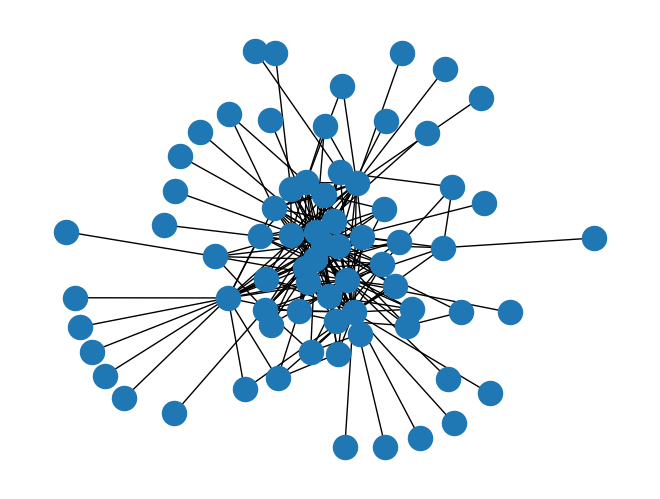

In [4]:
#  drawing in spectral layout
nx.draw_spring(a, with_labels = False)
plt.savefig("Grafo.png")

Preferential attachment, Adamic-Adar y Jaccard son tres medidas diferentes de similitud o conectividad en redes complejas. Estas son sus diferencias:

  -Preferential attachment: es un modelo de generación de redes complejas que se basa en el principio de que los nodos nuevos se unen preferentemente a los nodos más conectados de la red existente. En otras palabras, los nodos con muchos vecinos tienden a atraer nuevos enlaces con mayor frecuencia que los nodos con pocos vecinos. En términos de similitud, se puede utilizar la distribución de grados de los nodos para calcular la similitud de preferential attachment entre dos nodos.

  -Adamic-Adar: es una medida de similitud basada en el número de vecinos en común entre dos nodos. Sin embargo, esta medida da más peso a los vecinos comunes que tienen pocos vecinos en general. En otras palabras, los vecinos comunes raros tienen un mayor peso que los vecinos más comunes. Esta medida se utiliza a menudo en la recomendación de productos o enlaces basada en la similitud de la red.

  -Jaccard: es una medida de similitud basada en la cantidad de vecinos compartidos entre dos nodos dividida por la cantidad total de vecinos distintos entre los dos nodos. Esta medida se utiliza a menudo en la detección de comunidades y en la identificación de subgrafos densos en una red.

En resumen, Preferential attachment se basa en el número de vecinos de un nodo, Adamic-Adar se basa en la cantidad de vecinos raros compartidos y Jaccard se basa en la proporción de vecinos compartidos entre dos nodos. Cada medida tiene sus propias aplicaciones y se utiliza en diferentes contextos para analizar la estructura y la similitud de las redes complejas.


##Emparejamiento Preferencial PAC 

El método de preferential attachment sirve para modelar la formación de conexiones en una red. Básicamente, este modelo asume que los nuevos nodos en una red se unen a la misma siguiendo una cierta distribución de probabilidad que depende del número de conexiones que tienen los nodos existentes. En otras palabras, los nodos más conectados son más propensos a recibir nuevas conexiones, lo que puede llevar a la formación de una red con ciertas propiedades, como la aparición de nodos altamente conectados (también llamados "hubs" o "nodos centrales") y la distribución de grados de los nodos sigue una ley de potencias.

En resumen, el modelo de preferential attachment es una herramienta importante para entender cómo se forman y evolucionan las redes, y tiene importantes aplicaciones en diversas áreas de investigación.

En Python, el paquete NetworkX también proporciona una implementación del Emparejamiento Preferencial PAC. 

Con la funcion de preferential_attachment() se puede ver de esta forma.

(Guadalajara, Ciudad de Mexico): 806
(Guadalajara, Cancun): 806
(Los Cabos, Cancun): 589
(La Paz, Ciudad de Mexico): 465
(La Paz, Cancun): 465
(2, Monterrey): 442
(2, Tijuana): 416
(2, Cancun): 403
(2, Ciudad de Mexico): 403
(Felipe Angeles, Ciudad de Mexico): 372


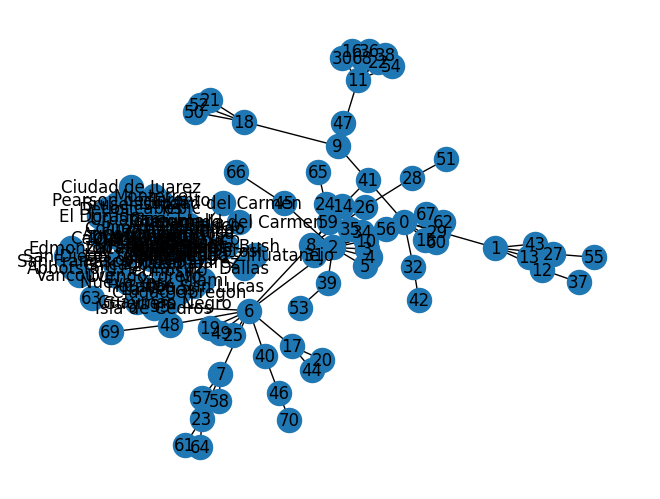

In [7]:
# Realiza la predicción de enlaces
predicted_edges = nx.algorithms.link_prediction.preferential_attachment(a)

# Ordena los enlaces predichos de mayor a menor
sorted_edges = sorted(predicted_edges, key=lambda x: x[2], reverse=True)

# Imprime los primeros 10 enlaces predichos
for i in range(10):
    print("({0}, {1}): {2}".format(sorted_edges[i][0], sorted_edges[i][1], sorted_edges[i][2]))

# Visualizar el grafo
nx.draw(a, with_labels=True)
plt.show()

Usamos el método preferential_attachment del paquete NetworkX para predecir enlaces. Este método devuelve una lista de tuplas, donde cada tupla representa un par de nodos y el número de enlaces que comparten.

Ordenamos la lista de tuplas por el número de enlaces compartidos de mayor a menor, y luego imprimimos los primeros 10 pares de nodos con más probabilidades de formar una arista en el futuro. El tercer elemento de cada tupla es el número de enlaces compartidos, por lo que lo utilizamos para ordenar la lista y para imprimir el número de enlaces compartidos junto con cada par de nodos. De los primeros 10 enlaces se agregó un nodo llamado "2" con Monterrey, Tijuana, Cancún y Ciudad de México; para Guadalajara se espera que exita la unión entre Ciudad de México y Cancún, estos son más probables de recibir una unión en un futuro y demuestra que el método es efectivo para agregar nuevos nodos con nuevas conexiones, si lo ponemos en práctica sería aplicándolo para nuevas rutas de acceso. 

Es importante tener en cuenta que la predicción de enlaces no siempre es precisa y depende en gran medida de la calidad de los datos disponibles y del modelo utilizado para hacer la predicción.

Implementando otro algoritmo pero sin la funcion de preferential_attachment(a)

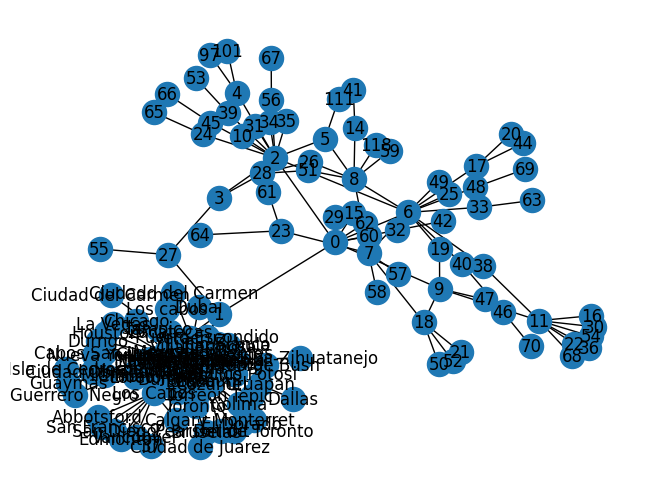

In [11]:
# Aplicar el modelo de preferential attachment para agregar más nodos
for i in range(2, 10):
    # Calcular las probabilidades de conectar con cada nodo existente
    probabilities = [len(a.edges(n)) for n in a.nodes()]
    total_probabilities = sum(probabilities)
    probabilities = [p / total_probabilities for p in probabilities]
    # Elegir un nodo existente al azar para conectar el nuevo nodo
    node_index = np.random.choice(range(len(a.nodes())), p=probabilities)
    a.add_node(i)
    a.add_edge(i, node_index)

# Visualizar el grafo
nx.draw(a, with_labels=True)
plt.show()

El método de Barabasi-Albert es un modelo específico dentro de la familia más amplia de modelos de preferential attachment. La principal diferencia entre estos dos modelos es que el método de Barabasi-Albert asume que los nodos nuevos se unen a los nodos existentes en función de su grado, es decir, la probabilidad de que un nodo nuevo se conecte a un nodo existente es proporcional al grado del nodo existente. Por otro lado, el modelo de preferential attachment asume que los nodos nuevos se unen a los nodos existentes en función de su número de conexiones previas, es decir, la probabilidad de que un nodo nuevo se conecte a un nodo existente es proporcional al número de conexiones que ya tiene ese nodo existente.

En resumen, ambos modelos tienen en cuenta el hecho de que las redes complejas tienden a tener nodos altamente conectados, pero utilizan diferentes medidas para cuantificar esta conectividad. El modelo de Barabasi-Albert utiliza el grado de los nodos como medida de su importancia, mientras que el modelo de preferential attachment utiliza el número de conexiones previas.

## Coeficiente Adamic-Adar (AAC)

El Coeficiente Adamic-Adar (AAC) es una medida de similitud de nodos en un grafo que se basa en la idea de que la similitud entre dos nodos es mayor si tienen vecinos en común que son poco comunes en el grafo. En Python, puedes implementar el Coeficiente Adamic-Adar utilizando el paquete NetworkX de la siguiente manera:

(Guadalajara, Ciudad de Mexico): 10.9116
(Guadalajara, Cancun): 8.3044
(Los Cabos, Cancun): 5.6600
(2, 11): 4.2237
(Felipe Angeles, Ciudad de Mexico): 4.1617
(0, 18): 3.7165
(La Paz, Ciudad de Mexico): 3.5198
(Los Angeles, Tijuana): 3.4585


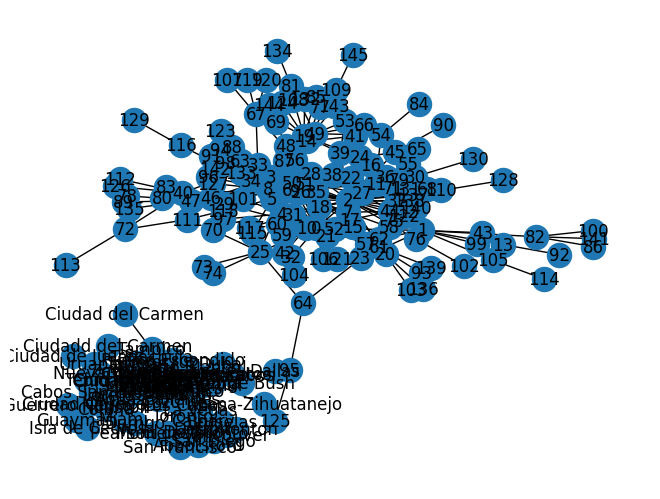

In [54]:
# Calcula el Coeficiente Adamic-Adar para todos los pares de nodos
aacs = nx.adamic_adar_index(a)

# Imprime los coeficientes Adamic-Adar de los primeros 5 pares de nodos
for u, v, p in sorted(aacs, key=lambda x: x[2], reverse=True)[:8]:
    print(f"({u}, {v}): {p:.4f}")

# Visualizar el grafo
nx.draw(a, with_labels=True)
plt.show()

In [34]:
import networkx as nx
import random
import math

# Crear un grafo aleatorio
#G = nx.erdos_renyi_graph(100, 0.1)

# Seleccionar un par de nodos que no estén conectados
i, j = random.sample(a.nodes(), 2)
while j in a.neighbors(i):
    i, j = random.sample(a.nodes(), 2)

# Calcular el conjunto de vecinos comunes
common_neighbors = set(a.neighbors(i)).intersection(set(a.neighbors(j)))

# Calcular el coeficiente Adamic-Adar
aac = sum([1 / math.log(a.degree(k)) for k in common_neighbors])

# Predecir si los nodos i y j estarán conectados en el futuro
if aac > 0.5:
    print("Se espera que los nodos", i, "y", j, "se conecten en el futuro.")
else:
    print("No se espera que los nodos", i, "y", j, "se conecten en el futuro.")

# Realiza la predicción de enlaces
predicted_edges = nx.algorithms.link_prediction.adamic_adar_index(a)

# Ordena los enlaces predichos de mayor a menor
sorted_edges = sorted(predicted_edges, key=lambda x: x[2], reverse=True)

# Imprime los primeros 10 enlaces predichos
for i in range(10):
    print("({0}, {1}): {2}".format(sorted_edges[i][0], sorted_edges[i][1], sorted_edges[i][2]))

Se espera que los nodos Tampico y Mexicali se conecten en el futuro.
(Ciudad de Mexico, Guadalajara): 10.91158627903303
(Cancun, Guadalajara): 8.30443853846459
(Cancun, Los Cabos): 5.659983382974981
(Ciudad de Mexico, Felipe Angeles): 4.16165020137847
(Ciudad de Mexico, La Paz): 3.519791371572783
(Tijuana, Los Angeles): 3.458536798017298
(Mexicali, Monterrey): 3.298859962180469
(Tijuana, Mexicali): 3.298859962180468
(Los Cabos, La Paz): 2.992676252999548
(Cancun, La Paz): 2.9912902421606304


<ipython-input-34-a87fedcdf886>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  i, j = random.sample(a.nodes(), 2)


Se implementó la función adamic_adar_index del paquete NetworkX para calcular el Coeficiente Adamic-Adar para todos los pares de nodos en el grafo.

La función devuelve un generador que produce tuplas de tres elementos: el primer nodo en el par, el segundo nodo en el par y el valor del Coeficiente Adamic-Adar para ese par de nodos.

Ordenamos la lista de tuplas por el valor del Coeficiente Adamic-Adar de mayor a menor, y luego imprimimos los primeros cinco pares de nodos con los valores de Coeficiente Adamic-Adar más altos.

Es importante tener en cuenta que el Coeficiente Adamic-Adar puede ser computacionalmente costoso de calcular para grandes grafos. Si necesitas calcular el Coeficiente Adamic-Adar en un grafo grande, puedes considerar utilizar técnicas de muestreo o aproximación para reducir el costo computacional.

En nuestra ejecución, además de poder observar nuestro nuevo grafo con nuevas rutas, se observa algunos estados de la república que hacen conexión con otros estados que en nuestro grafo principal no tenían, por ejemplo: 
Ciudad de México con Guadalajara. 

## Coeficiente Jaccard (JAC)

El Coeficiente Jaccard (JAC) es una medida de similitud de nodos en un grafo que se basa en la idea de que la similitud entre dos nodos es mayor si tienen más vecinos en común en proporción al total de sus vecinos. En Python, puedes implementar el Coeficiente Jaccard utilizando el paquete NetworkX de la siguiente manera:

(Miami, Houston): 1.0000
(Miami, Nueva York): 1.0000
(Miami, La Vegas): 1.0000
(Miami, Durngo): 1.0000
(Tepic, Uruapan): 1.0000
(Tepic, Colima): 1.0000
(Dubai, Los cabos): 1.0000
(43, 99): 1.0000
(Guerrero Negro, Isla de Cedros): 1.0000
(Guerrero Negro, Guaymas): 1.0000
(Uruapan, Colima): 1.0000
(52, 21): 1.0000
(71, 75): 1.0000
(71, 79): 1.0000
(71, 122): 1.0000
(71, 131): 1.0000
(71, 137): 1.0000
(71, 138): 1.0000
(71, 140): 1.0000
(75, 79): 1.0000


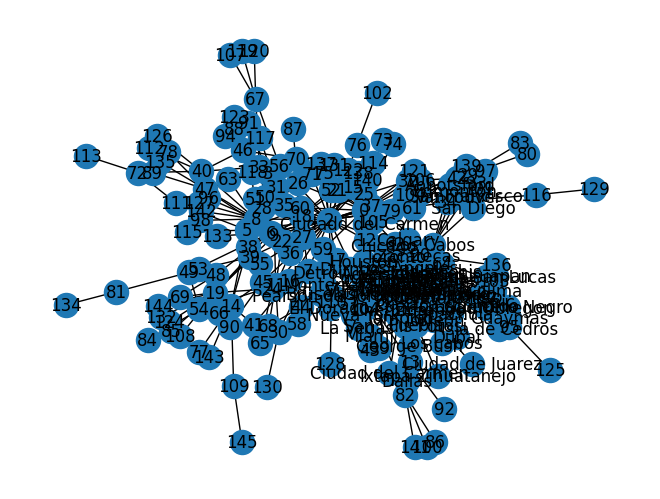

In [55]:
# Calcula el Coeficiente Jaccard para todos los pares de nodos
jacs = nx.jaccard_coefficient(a)

# Imprime los coeficientes Jaccard de los primeros 20 pares de nodos
for u, v, p in sorted(jacs, key=lambda x: x[2], reverse=True)[:20]: 
    print(f"({u}, {v}): {p:.4f}")

# Visualizar el grafo
nx.draw(a, with_labels=True)
plt.show()

In [35]:
# Realiza la predicción de enlaces
predicted_edges = nx.algorithms.link_prediction.jaccard_coefficient(a)

# Ordena los enlaces predichos de mayor a menor
sorted_edges = sorted(predicted_edges, key=lambda x: x[2], reverse=True)

# Imprime los primeros 10 enlaces predichos
for i in range(10):
    print("({0}, {1}): {2}".format(sorted_edges[i][0], sorted_edges[i][1], sorted_edges[i][2]))

(0, 1): 1.0
(5, 9): 1.0
(7, 19): 1.0
(San Francisco, Abbotsford): 1.0
(San Francisco, Edmonton): 1.0
(San Francisco, San Diego): 1.0
(San Francisco, Vancouver): 1.0
(Dubai, Los cabos): 1.0
(Uruapan, Colima): 1.0
(Uruapan, Tepic): 1.0


Con la función jaccard_coefficient del paquete networkX calcula el coeficiente Jaccard para todos los pares de nodos en el grafo.

Ordenamos la lista de tuplas por el valor del Coeficiente Jaccard de mayor a menor, y luego imprimimos los primeros cinco pares de nodos con los valores de Coeficiente Jaccard más altos.


Principalmente se creó un grafo con las conexiones que se presentan en los Aeropuertos de los Estados de la República Mexican, en algunos estados se hizo la conexión entre otros países, precisamente para ver el comportamiento de estos métodos. Para el caso de Jaccard se observan rutas nuevas en el extranjero, por ejemplo, con San Francisco generó la unión entre Abbotsford, Edmonton, San Diego y Vancouver. Miami tambien hizo varias uniones con otros países. 